In [1]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Replace with the actual path to your files in your Drive
df_target = pd.read_csv('/content/drive/MyDrive/Train_60/Train_60/Y_Train_Data_Target.csv')
df_input = pd.read_csv('/content/drive/MyDrive/Train_60/Train_60/X_Train_Data_Input.csv')


Logistic Regression Test Results:
Accuracy: 0.9648774225102402
Precision: 0.7290150842945874
Recall: 0.9987843423292001
F1 Score: 0.8428395568321707
AUC-ROC: 0.9890813130241809
Log Loss: 0.14021920138266053
Balanced Accuracy: 0.9800658297958513
Confusion Matrix:
[[227872   9162]
 [    30  24648]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    237034
           1       0.73      1.00      0.84     24678

    accuracy                           0.96    261712
   macro avg       0.86      0.98      0.91    261712
weighted avg       0.97      0.96      0.97    261712


Random Forest Test Results:
Accuracy: 0.9766995781622547
Precision: 0.835742681604626
Recall: 0.9370694545749251
F1 Score: 0.8835103537862
AUC-ROC: 0.9939615765064682
Log Loss: 0.05609912703391639
Balanced Accuracy: 0.9589474950760498
Confusion Matrix:
[[232489   4545]
 [  1553  23125]]

Classification Report:
              precision    recall  f1

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Test Results:
Accuracy: 0.9774102830592407
Precision: 0.830317538548194
Recall: 0.9557500607828835
F1 Score: 0.8886293421746666
AUC-ROC: 0.9946017216407675
Log Loss: 0.05202637921381014
Balanced Accuracy: 0.9677077126226828
Confusion Matrix:
[[232214   4820]
 [  1092  23586]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    237034
           1       0.83      0.96      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.97      0.94    261712
weighted avg       0.98      0.98      0.98    261712


Best Model: XGBoost with ROC-AUC: 0.9946017216407675
Accuracy: 0.9774102830592407
Precision: 0.830317538548194
Recall: 0.9557500607828835
F1 Score: 0.8886293421746666
Confusion Matrix:
[[232214   4820]
 [  1092  23586]]


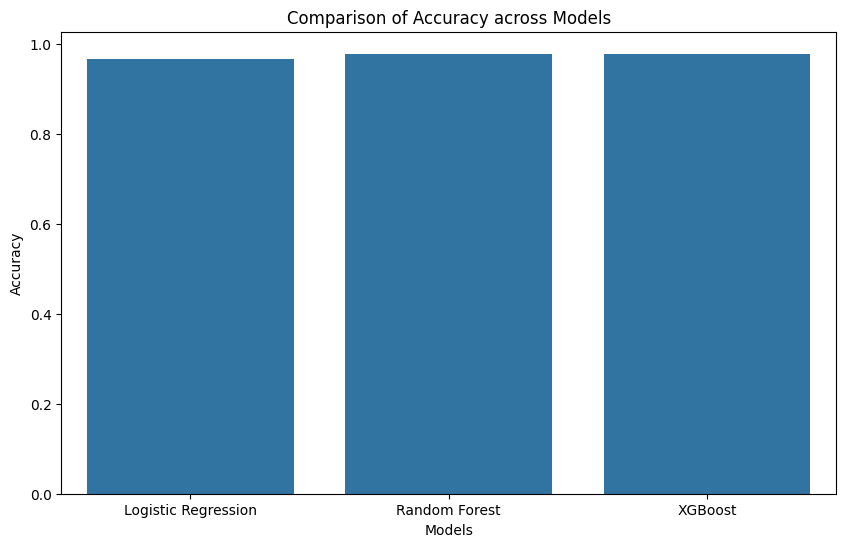

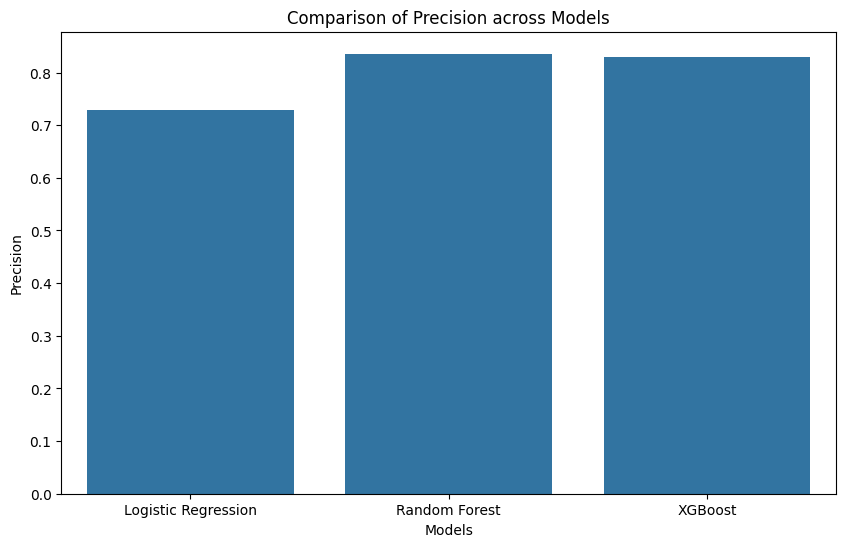

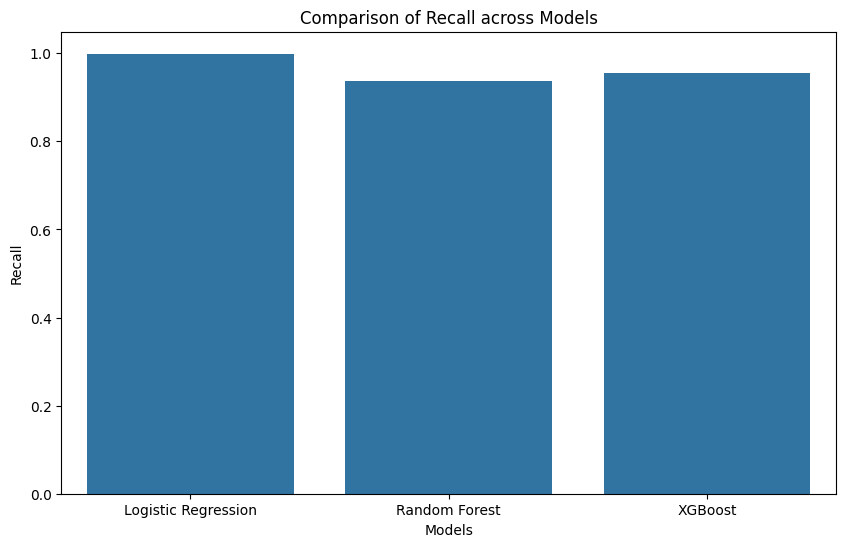

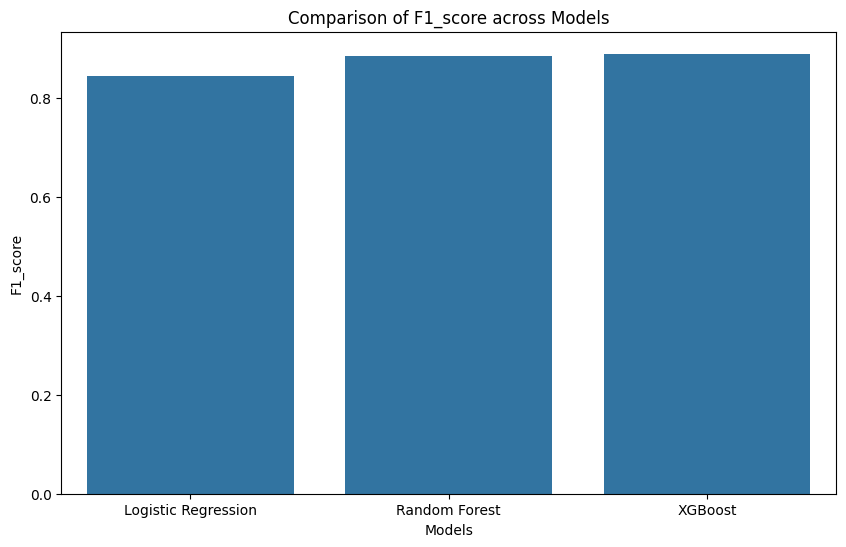

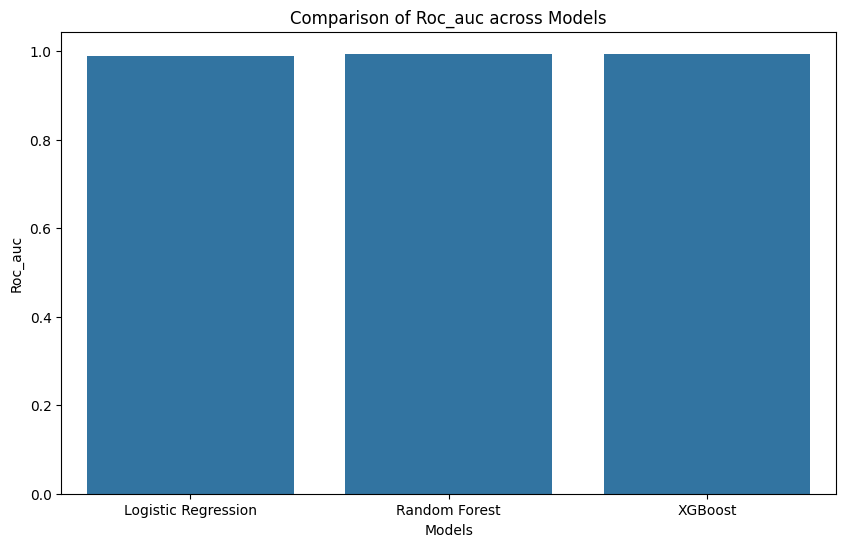

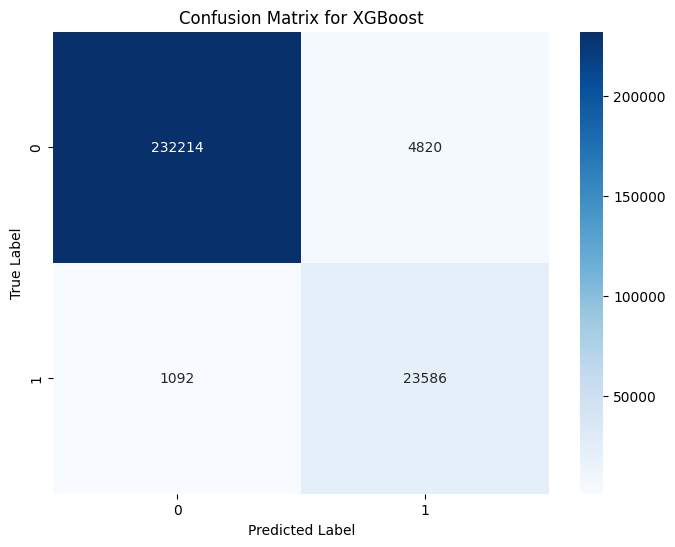

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, log_loss,
    balanced_accuracy_score
)

# Load the pre-split datasets
df_target_train = pd.read_csv('/content/drive/MyDrive/Train_60/Train_60/Y_Train_Data_Target.csv')
df_input_train = pd.read_csv('/content/drive/MyDrive/Train_60/Train_60/X_Train_Data_Input.csv')
df_target_test = pd.read_csv('/content/drive/MyDrive/Test_20/Test_20/Y_Test_Data_Target.csv')
df_input_test = pd.read_csv('/content/drive/MyDrive/Test_20/Test_20/X_Test_Data_Input.csv')

# Assume the 'ID' column is categorical and should be dropped for training
X_train = df_input_train.drop('ID', axis=1)
y_train = df_target_train['target']
X_test = df_input_test.drop('ID', axis=1)
y_test = df_target_test['target']

# Step 1: Handle missing values (NA)
imputer = SimpleImputer(strategy='mean')  # Impute numerical columns using mean
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 2: Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

# Step 3: Scale the data after SMOTE
scaler = StandardScaler()
X_train_preprocessed = scaler.fit_transform(X_train_resampled)
X_test_preprocessed = scaler.transform(X_test_imputed)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=3000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
}

# Store metrics
model_metrics = {}

# Step 4: Train models and evaluate
for model_name, model in models.items():
    model.fit(X_train_preprocessed, y_train_resampled)

    # Predict on test set
    y_pred = model.predict(X_test_preprocessed)
    y_prob = model.predict_proba(X_test_preprocessed)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    conf_matrix = confusion_matrix(y_test, y_pred)
    log_loss_val = log_loss(y_test, y_prob) if y_prob is not None else None
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    # Store metrics
    model_metrics[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': conf_matrix,
        'log_loss': log_loss_val,
        'balanced_accuracy': balanced_acc
    }

    # Print metrics
    print(f"\n{model_name} Test Results:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC-ROC: {roc_auc}")
    print(f"Log Loss: {log_loss_val}")
    print(f"Balanced Accuracy: {balanced_acc}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

# Step 5: Determine the best model based on AUC-ROC
best_model_name = max(model_metrics, key=lambda k: model_metrics[k]['roc_auc'])
best_model_metrics = model_metrics[best_model_name]

# Print the best model results
print(f"\nBest Model: {best_model_name} with ROC-AUC: {best_model_metrics['roc_auc']}")
print(f"Accuracy: {best_model_metrics['accuracy']}")
print(f"Precision: {best_model_metrics['precision']}")
print(f"Recall: {best_model_metrics['recall']}")
print(f"F1 Score: {best_model_metrics['f1_score']}")
print(f"Confusion Matrix:\n{best_model_metrics['confusion_matrix']}")

# Plot the results
def plot_metric_comparison(metrics_dict, metric_name):
    models = list(metrics_dict.keys())
    values = [metrics_dict[model][metric_name] for model in models]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=models, y=values)
    plt.title(f'Comparison of {metric_name.capitalize()} across Models')
    plt.ylabel(metric_name.capitalize())
    plt.xlabel('Models')
    plt.show()

# Plot Accuracy, Precision, Recall, F1, ROC-AUC
plot_metric_comparison(model_metrics, 'accuracy')
plot_metric_comparison(model_metrics, 'precision')
plot_metric_comparison(model_metrics, 'recall')
plot_metric_comparison(model_metrics, 'f1_score')
plot_metric_comparison(model_metrics, 'roc_auc')

# Confusion Matrix Plot (for best model)
best_model_conf_matrix = best_model_metrics['confusion_matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(best_model_conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
print("Best Team!")

Best Team! 
